# Práctica 1 - 3200 Phaeton
# Simulación 1
## Origen y Evolución de los Sistemas Planetarios
## Facultad de Ciencias, UNAM, 2021-1

Un estudio del movimiento de 3200 Phaeton visto desde el marco de referencia que co-rota con Venus.

# Importación de librerias

In [17]:
import numpy as np                            # Para almacenar información y hacer cálculos con ella 
import matplotlib as mpl                      # Para graficar
import matplotlib.pyplot as plt               # Más para graficar
from mpl_toolkits.mplot3d import Axes3D       # Para gráficas en 3D
import matplotlib.animation as animation      # Para hacer animaciones
import matplotlib.image as mpimg              # Para hacer gifs
import rebound                                # Para la simulación

# Colores
c1 = '#993399'
c2 = '#339999'

# Para que las gráficas se puedan ver conforme las hacemos
%matplotlib inline

# Información inicial 

En la siguiente celda deben poner la información sobre la resonancia del objeto que analizarán.

Primero deben cambiar "indPlaneta" que corresponde al índice en la simulación del planeta que esté en resonancia
con el objeto que eligieron. Los índices son:
1. Mercurio
2. Venus
3. Tierra
4. Marte
5. Júpiter
6. Saturno
7. Urano
8. Neptuno

A "indObjeto" no lo muevan, le puse 9 porque es el que le corresponde en la simulación al "objeto en estudio".

Después cambien el número de periodos necesarios para observar la resonancia, por ejemplo: 

El objeto que quiero estudiar, 3200 Phaeton, está en resonancia 3:7 con Venus (es decir, 3200 Phaeton da 3 vueltas al Sol mientras Venus da 7). Por ello, en numObjeto pongo 3 (las vueltas que debe dar 3200 Phaeton) y en numPlaneta pongo 7 (las que da Venus) para que el diagrama se vea completo. 
El código más adelante solito con esta información obtiene cuál es el tiempo ideal para la simulación :) 

In [18]:
"""Información sobre la resonancia"""

# Objeto a analizar 
Objeto = '1983 TB'          # 3200 Phaeton

# Índices
indObjeto  = 9              # 3200 Phaeton
indPlaneta = 2              # Venus

# Número de periodos necesarios para observar la resonancia
numObjeto  = 3              # Vueltas que da 3200 Phaeton
numPlaneta = 7              # Vueltas que da Venus

# Inicializando la simulación

In [19]:
""" Inicializando la simulación """

sim = rebound.Simulation()            # Se inicia la simulación
sim.units = ('AU', 'yr', 'Msun')      # Se asignan unidades: UA (distancia), años (tiempo), masas solares (masa)
# Integrador
sim.integrator = 'ias15'              # Nos interesa la precisión

In [20]:
""" Incluyendo objetos en la simulación """

Sol = ['Sun']
Planetas = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

sim.add(Sol)
sim.add(Planetas)
sim.add(Objeto)     # 3200 Phaeton

#sim.particles[indObjeto].m = 7e-20        Masa de 3200 Phaeton (se puede considerar sin masa)

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for '1983 TB'... Found: 3200 Phaethon (1983 TB).


/home/luiseduardo/anaconda3/lib/python3.8/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [21]:
sim.move_to_com()               # Nos movemos al centro de masa

# Gráfica con las órbitas

/home/luiseduardo/anaconda3/lib/python3.8/site-packages/rebound/plotting.py:81: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main)
/home/luiseduardo/anaconda3/lib/python3.8/site-packages/rebound/plotting.py:83: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main)


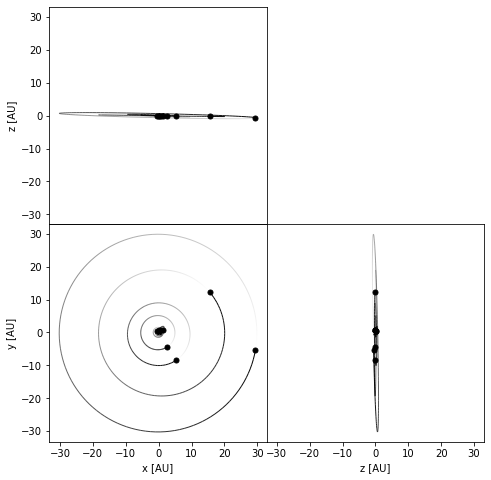

In [22]:
# Grafica las órbitas de las partículas en la simulación
fig = rebound.OrbitPlot(sim, unitlabel = '[AU]', slices = 1)

# Guardar la gráfica en un archivo
plt.savefig('orbita.pdf', bbox_inches = 'tight');

# Más parámetros de la simulación

In [23]:
""" Determinando el tiempo de integración """

periodoPlaneta = sim.particles[indPlaneta].P         # Periodo de Venus
periodoObjeto  = sim.particles[indObjeto].P          # Periodo de 3200 Phaeton

vueltasPlaneta = numPlaneta * periodoPlaneta         # 7*Periodo de Venus
vueltasObjeto  = numObjeto  * periodoObjeto          # 3*Periodo de 3200 Phaeton

# Para visualizar cual número es mayor
print(vueltasPlaneta, vueltasObjeto)

4.306345638148299 4.409405294998085


In [24]:
# El tiempo de simulación es el máximo entre vueltasPlaneta y vueltasObjeto para que se observe la resonancia
tSim = np.maximum(vueltasPlaneta, vueltasObjeto)    
# Número de salidas
N = 1500
# Array para guardar los tiempos
tiempos = np.linspace(0,tSim,N)

# Haciendo la simulación

In [25]:
""" Arreglos para almacenar la información """

# Arreglo para guardar los tiempos
t = []

# Arreglos para guardar las coordenadas x,y,z de los objetos en el marco inercial
XPlaneta, YPlaneta, ZPlaneta = [], [], []
XObjeto, YObjeto, ZObjeto = [], [], []

# Arreglos para guardar los elementos orbitales
inc, Omega, omega, M = [], [], [], []

In [26]:
""" Haciendo la integración """

# Integración
for i,tiempo in enumerate(tiempos):
    
    # Se integra hasta t = tiempo
    sim.integrate(tiempo)
    t.append(tiempo)
    
    j = 0
    # Se itera sobre las partículas
    for p in sim.particles:
        # Se guardan las coordenadas de Venus
        if j == indPlaneta:
            XPlaneta.append(p.x)
            YPlaneta.append(p.y)
            ZPlaneta.append(p.z)
        # Se guardan las coordenadas de 3200 Phaeton
        if j == indObjeto:
            XObjeto.append(p.x)
            YObjeto.append(p.y)
            ZObjeto.append(p.z)  
        j = j + 1
        
    k = 1
    # Se calculan los elementos orbitales
    for o in sim.calculate_orbits():
        # Se guardan los elementos orbitales de Venus
        if k == indPlaneta:
            inc.append(o.inc)
            Omega.append(o.Omega)
            omega.append(o.omega)
            M.append(o.M)
        k = k + 1

# Haciendo la rotación 

In [27]:
"""Haciendo la rotación"""
# Arrays para guardar las coordenadas x,y,z en el marco no inercial
xPlaneta, yPlaneta, zPlaneta = [], [], []
xObjeto,  yObjeto,  zObjeto  = [], [], []

In [28]:
i = 0

# Se itera sobre los tiempos de la simulación
for i in range(0, len(t)):
    
    # Calculando senos y cosenos
    
    cO = np.cos(Omega[i])
    sO = np.sin(Omega[i])
    
    cI = np.cos(inc[i])
    sI = np.sin(inc[i]) 
    
    cT = np.cos(omega[i] + M[i])
    sT = np.sin(omega[i] + M[i])
    
    # Haciendo la rotación del planeta
    
    X = XPlaneta[i]
    Y = YPlaneta[i]
    Z = ZPlaneta[i]
    
    x = (+ X*(cO*cT - cI*sO*sT) + Y*(sO*cT + cI*cO*sT) + Z*(sI*sT))
    y = (- X*(cO*sT + cI*sO*cT) + Y*(-sO*sT+ cI*cO*cT) + Z*(sI*cT))
    z = (+ X*(sI*sO) - Y*(sI*cO) + Z*(cI))
    
    xPlaneta.append(x)
    yPlaneta.append(y)
    zPlaneta.append(z)
        
    # Haciendo la rotación del objeto
    
    X = XObjeto[i]
    Y = YObjeto[i]
    Z = ZObjeto[i]
    
    x = (+ X*(cO*cT - cI*sO*sT) + Y*(sO*cT + cI*cO*sT) + Z*(sI*sT))
    y = (- X*(cO*sT + cI*sO*cT) + Y*(-sO*sT+ cI*cO*cT) + Z*(sI*cT))
    z = (+ X*(sI*sO) - Y*(sI*cO) + Z*(cI))
    
    xObjeto.append(x)
    yObjeto.append(y)
    zObjeto.append(z)

# Gráficas

## Gráfica en 2D

In [54]:
'''Posición promedio de Venus'''
print(np.average(xPlaneta),np.average(yPlaneta))

0.7231364852949143 8.35076838486689e-05


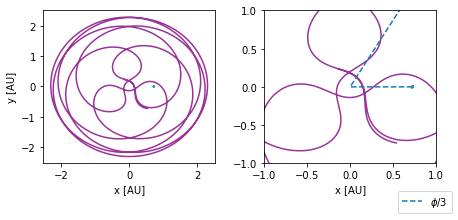

In [74]:
# Tamaño de la figura (2 subplots en un array horizontal)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6.5,3.25))

# Primera gráfica
ax1.plot(xObjeto, yObjeto, color = c1)
ax1.plot(xPlaneta, yPlaneta, color = c2)
ax1.set_xlabel(r'x [AU]')
ax1.set_ylabel(r'y [AU]')
# Segunda gráfica
ax2.plot(xObjeto, yObjeto, color = c1)
ax2.plot(xPlaneta, yPlaneta, color = c2)
ax2.set_xlabel(r'x [AU]')
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.plot([0.72,0,0.72],[0,0,1.259],linestyle='--',label='$\phi/3$') # (1/3)*phi

# Leyenda fuera del gráfico
plt.legend(loc='center left',bbox_to_anchor = (0.75,-0.25))

# Para evitar que se encimen los ejes
fig.tight_layout()
# Guardar la gráfica en un archivo
plt.savefig('resonancia.pdf',bbox_inches='tight');

## Gráfica en 3D

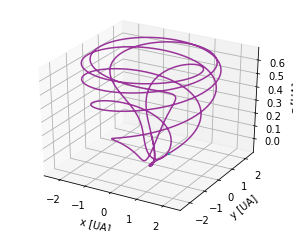

In [75]:
# Tamaño de la figura
fig = plt.figure(figsize=(5,4))
# Gráfica en 3D
ax = plt.axes(projection='3d')

# Gráficas
ax.plot(xObjeto, yObjeto, zObjeto, color = c1)      # 3200 Phaeton
ax.plot(xPlaneta, yPlaneta, zPlaneta, color = c2)   # Venus

# Etiquetas de los ejes
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]')
ax.set_zlabel('z [UA]')

# Guardar la gráfica en un archivo
plt.savefig('resonancia3D.pdf',bbox_inches='tight');

# Animación

MovieWriter stderr:
convert-im6.q16: DistributedPixelCache '127.0.0.1' @ error/distribute-cache.c/ConnectPixelCacheServer/244.
convert-im6.q16: cache resources exhausted `-' @ error/cache.c/OpenPixelCache/3984.
convert-im6.q16: no images defined `orbita.gif' @ error/convert.c/ConvertImageCommand/3258.



CalledProcessError: Command '['convert', '-size', '936x468', '-depth', '8', '-delay', '3.0', '-loop', '0', 'rgba:-', 'orbita.gif']' returned non-zero exit status 1.

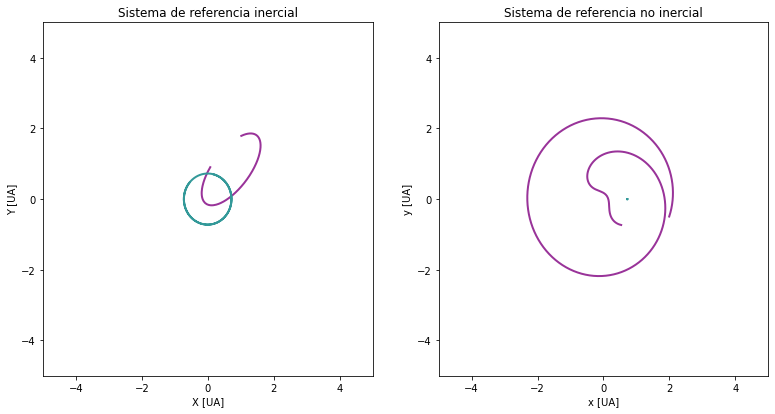

In [76]:
def basic_animation(frames, interval):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6.5))
    ax1.set_xlim(-5,5)
    ax2.set_xlim(-5,5)

    ax1.set_ylim(-5,5)
    ax2.set_ylim(-5,5)
    
    ax1.set_title('Sistema de referencia inercial')
    ax2.set_title('Sistema de referencia no inercial')

    ax1.set_xlabel('X [UA]')
    ax1.set_ylabel('Y [UA]')

    ax2.set_xlabel('x [UA]')
    ax2.set_ylabel('y [UA]')

    line1A, = ax1.plot([], [], lw=2, color = c1)
    line1B, = ax2.plot([], [], lw=2, color = c1)
    
    line2A, = ax1.plot([], [], lw=2, color = c2)
    line2B, = ax2.plot([], [], lw=2, color = c2)
    
    #ax1.legend(loc = 3)

    #x = np.linspace(0, 10, 1000)

    def init():
        line1A.set_data([], [])
        line1B.set_data([], [])
        line2A.set_data([], [])
        line2B.set_data([], [])
        return  line1A, line1B, line2A, line2B

    def animate(i):
        
        x, y = XObjeto[:i], YObjeto[:i]
        line1A.set_data(x, y)
        
        x, y = xObjeto[:i], yObjeto[:i]
        line1B.set_data(x, y)
        
        x, y = XPlaneta[:i], YPlaneta[:i]
        line2A.set_data(x, y)
        
        x, y = xPlaneta[:i], yPlaneta[:i]
        line2B.set_data(x, y)        

        
        return line1A, line1B, line2A, line2B

    return animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval) 

anim = basic_animation(frames=N, interval=30)
anim.save('orbita.gif',writer='imagemagick')